In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Read the JSON file into a pandas dataframe
url = "https://ai-process-sandy.s3.eu-west-1.amazonaws.com/purge/deviation.json"
df = pd.read_json(url)

In [4]:
if df.isnull().any().any():
    print("There are missing values in the DataFrame.")
else:
    print("There are no missing values in the DataFrame.")

There are no missing values in the DataFrame.


In [5]:
df.head()

,name,gt_corners,rb_corners,mean,max,min,floor_mean,floor_max,floor_min,ceiling_mean,ceiling_max,ceiling_min
0,Schlafzimmer,4,4,3.956313,8.562939,0.274574,3.987864,8.562939,0.274574,3.924762,8.501885,0.331494
1,Küche,4,4,23.019122,52.605437,0.724299,1.253103,1.897612,0.724299,44.785141,52.605437,36.880814
2,Bathroom,4,4,1.013833,1.950322,0.301673,0.659138,1.318714,0.301673,1.368528,1.950322,0.878106
3,Lounge/Diner,8,8,3.832620,18.236935,0.173307,3.600083,15.041431,0.173307,4.065157,18.236935,0.253457
4,Essbereich,4,4,8.017758,15.642853,0.762948,7.819446,15.399635,0.762948,8.216069,15.642853,0.909029


In [6]:
df.tail()

,name,gt_corners,rb_corners,mean,max,min,floor_mean,floor_max,floor_min,ceiling_mean,ceiling_max,ceiling_min
1342,Master Bedroom,4,4,1.739907,4.703960,0.166677,0.487452,1.074033,0.166677,2.992362,4.703960,1.216172
1343,Master Bedroom 2,4,4,0.530908,0.786997,0.101973,0.323746,0.614770,0.101973,0.738071,0.786997,0.670290
1344,Zimmer I,4,4,0.880569,1.221873,0.362600,0.823587,1.120810,0.362600,0.937550,1.221873,0.490739
1345,Hallway Bathroom,6,6,24.923452,64.266820,0.064699,24.857904,64.123596,0.064699,24.988999,64.266820,0.074356
1346,Bedroom 4,4,4,0.387328,0.762659,0.166426,0.349720,0.730373,0.205136,0.424936,0.762659,0.166426


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1347 entries, 0 to 1346
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          1347 non-null   object 
 1   gt_corners    1347 non-null   int64  
 2   rb_corners    1347 non-null   int64  
 3   mean          1347 non-null   float64
 4   max           1347 non-null   float64
 5   min           1347 non-null   float64
 6   floor_mean    1347 non-null   float64
 7   floor_max     1347 non-null   float64
 8   floor_min     1347 non-null   float64
 9   ceiling_mean  1347 non-null   float64
 10  ceiling_max   1347 non-null   float64
 11  ceiling_min   1347 non-null   float64
dtypes: float64(9), int64(2), object(1)
memory usage: 136.8+ KB


In [8]:
df.describe()

,gt_corners,rb_corners,mean,max,min,floor_mean,floor_max,floor_min,ceiling_mean,ceiling_max,ceiling_min
count,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000
mean,4.307350,4.307350,12.895320,25.448011,2.920388,11.022443,20.405499,3.146246,14.768198,24.848020,5.521437
std,0.814412,0.814412,21.839948,42.758159,9.258972,19.136320,33.189081,9.559611,26.047057,42.345579,14.460565
min,4.000000,4.000000,0.192973,0.323886,0.007456,0.134686,0.178059,0.007456,0.123169,0.220846,0.009268
25%,4.000000,4.000000,0.658488,1.243804,0.147432,0.514150,0.888043,0.164668,0.742915,1.180960,0.306071
50%,4.000000,4.000000,2.123456,4.703514,0.279876,1.932503,4.008014,0.304374,2.159995,3.777277,0.600597
75%,4.000000,4.000000,14.810982,28.312051,0.674444,13.430288,24.986504,0.801416,15.150233,27.551533,1.840563
max,10.000000,10.000000,121.301055,179.165483,81.764483,121.244083,177.961811,81.791505,157.387474,179.165483,144.472533


1. We can compare the number of ground truth corners (Gt_corners) to the number of corners found by the model (Rb_corners). In this case, we see that the model was able to correctly identify the number of corners in each room, as the counts for Gt_corners and Rb_corners are the same in every row of the table and the total amount equals to 1347 as it is. 
2. The mean values for both "gt_corners" and "rb_corners" are 4.307350, which indicates that on average, there are 4 corners in the room and the model is able to detect those corners accurately.
3. The maximum value for "rb_corners" is 10, which means that the model is able to detect up to 10 corners in a room.
4. The standard deviation for "rb_corners" is relatively high at 0.814412, which suggests that there is significant variation in the number of corners detected by the model across different rooms.
5. The mean value for "mean" is 12.895320, which indicates that the model tends to slightly overestimate the number of corners in a room on average.
6. The maximum value for "mean" is 121.301055, which suggests that there are some instances where the model greatly overestimates the number of corners in a room.
7. The minimum value for "min" is very low at 0.007456, which indicates that the model is generally able to accurately detect rooms with very few corners.
Overall, it seems that the model performs reasonably well in detecting the number of corners in a room.

In [9]:
corr_matrix = df.corr()
print(corr_matrix)

              gt_corners  rb_corners      mean       max       min  \
gt_corners      1.000000    1.000000  0.130753  0.183241  0.005158   
rb_corners      1.000000    1.000000  0.130753  0.183241  0.005158   
mean            0.130753    0.130753  1.000000  0.945928  0.672207   
max             0.183241    0.183241  0.945928  1.000000  0.489443   
min             0.005158    0.005158  0.672207  0.489443  1.000000   
floor_mean      0.154939    0.154939  0.954501  0.852427  0.745491   
floor_max       0.229922    0.229922  0.942309  0.911243  0.578652   
floor_min       0.000692    0.000692  0.678960  0.498912  0.973961   
ceiling_mean    0.105436    0.105436  0.975705  0.960021  0.579565   
ceiling_max     0.184563    0.184563  0.940502  0.996956  0.481758   
ceiling_min    -0.010457   -0.010457  0.786345  0.648461  0.687748   

              floor_mean  floor_max  floor_min  ceiling_mean  ceiling_max  \
gt_corners      0.154939   0.229922   0.000692      0.105436     0.184563   
rb_co

The diagonal values in the matrix are all 1, indicating a perfect correlation between a variable and itself.<br>
The correlation coefficient between ground truth number of corners and number of corners found by the model is 1, indicating a perfect positive correlation. This suggests that the model performed very well in detecting the corners in the room.<br>
**The highest correlation** between any two variables other than the perfect correlation between a variable and itself is between mean and ceiling_mean, with a coefficient of **0.975705**. This suggests a very strong positive correlation between these two variables.<br>
**The lowest correlation** between any two variables is between ground truth number of corners and ceiling_min, with a coefficient of **-0.010457**. This suggests a weak negative correlation between these two variables.

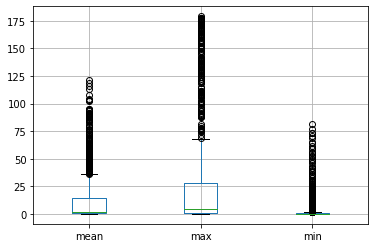

In [10]:
df.boxplot(column=['mean', 'max', 'min'])
plt.show()

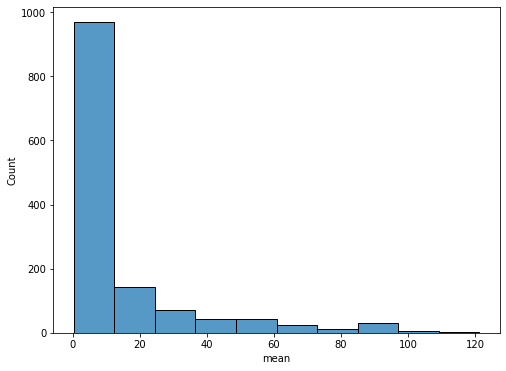

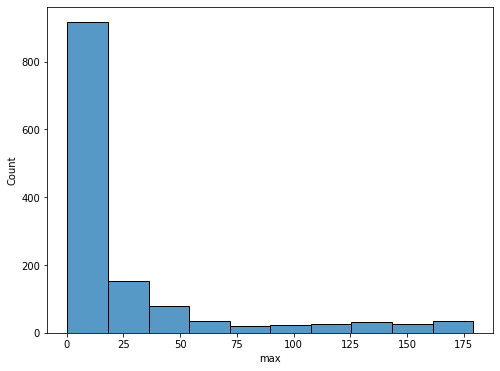

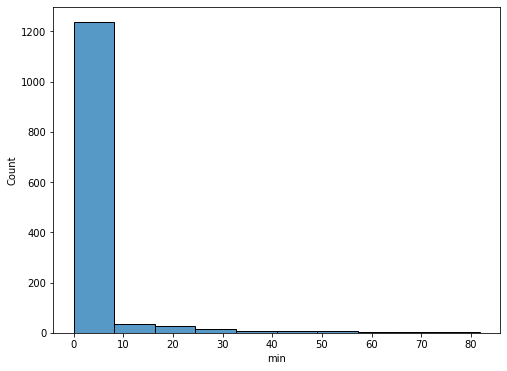

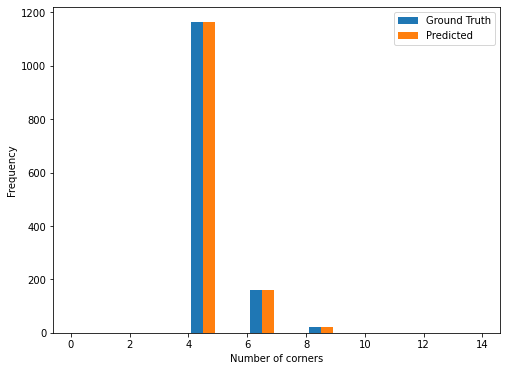

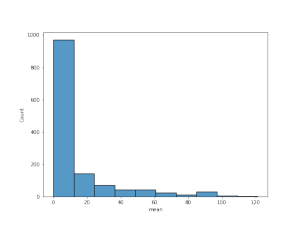

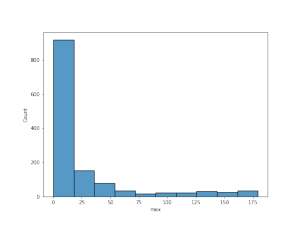

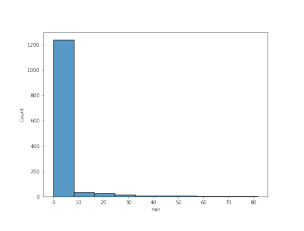

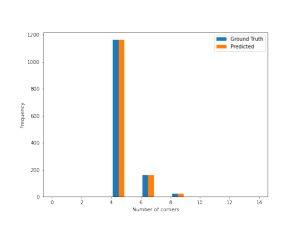

In [19]:
from plotter import Plotting

# Create an instance of the Plotter class
plotter = Plotting()

# Call the draw_plots() function and store the paths to the generated plots
plot_paths = plotter.draw_plots(df)

# Display the plots in the notebook
for path in plot_paths:
    plt.figure()
    plt.imshow(plt.imread(path))
    plt.axis('off')
    plt.show()


In [13]:
df.head(10)

,name,gt_corners,rb_corners,mean,max,min,floor_mean,floor_max,floor_min,ceiling_mean,ceiling_max,ceiling_min
0,Schlafzimmer,4,4,3.956313,8.562939,0.274574,3.987864,8.562939,0.274574,3.924762,8.501885,0.331494
1,Küche,4,4,23.019122,52.605437,0.724299,1.253103,1.897612,0.724299,44.785141,52.605437,36.880814
2,Bathroom,4,4,1.013833,1.950322,0.301673,0.659138,1.318714,0.301673,1.368528,1.950322,0.878106
3,Lounge/Diner,8,8,3.832620,18.236935,0.173307,3.600083,15.041431,0.173307,4.065157,18.236935,0.253457
4,Essbereich,4,4,8.017758,15.642853,0.762948,7.819446,15.399635,0.762948,8.216069,15.642853,0.909029
5,Wohnzimmer,4,4,18.201964,30.170499,9.929660,18.091045,28.885998,9.929660,18.312884,30.170499,9.932862
6,Büro,6,6,4.155999,6.492000,0.338442,4.036335,6.347297,0.338442,4.275663,6.492000,0.436603
7,Flur,6,6,0.728829,1.781801,0.210813,0.695057,1.756475,0.210813,0.762602,1.781801,0.240982
8,Flur,4,4,15.445758,55.451122,0.034334,0.363172,0.655042,0.034334,30.528344,55.451122,11.313012
9,Eingangsbereich,4,4,19.379779,41.845995,0.179151,0.759095,1.373219,0.179151,38.000463,41.845995,33.773640


In [14]:
df['name'].value_counts()

Master Bedroom              42
Dining room                 36
Bathroom                    36
Bedroom 2                   31
Hallway                     31
                            ..
First Floor 9                1
Lower front left bedroom     1
Bathroom Jack Jill  3        1
1206B                        1
Basement #5 Dining room      1
Name: name, Length: 588, dtype: int64

In [15]:
# Calculate mean deviation in degrees
mean_deviation = np.mean(abs(df['mean']))

# Calculate standard deviation of deviation values
std_deviation = np.std(df[['mean', 'max', 'min']])

# Calculate mean deviation between floor_mean and ceiling_mean
floor_ceiling_deviation = np.mean(abs(df['floor_mean'] - df['ceiling_mean']))

print(f"Mean deviation in degrees: {mean_deviation:.2f}")
print("std_deviation results are:")
print(std_deviation)
print(f"Mean deviation between floor_mean and ceiling_mean: {floor_ceiling_deviation:.2f}")

Mean deviation in degrees: 12.90
std_deviation results are:
mean    21.831840
max     42.742285
min      9.255534
dtype: float64
Mean deviation between floor_mean and ceiling_mean: 4.24


The results provided suggest that the average deviation between the measured angles and the mean angle is 12.90 degrees.<br>

The std_deviation results show the statistical properties of the deviation values. The mean deviation is 21.83 degrees, indicating that the deviations from the mean angle are quite spread out. The maximum deviation is 42.74 degrees, which is a large deviation and indicates that some of the measured angles differ significantly from the mean angle. The minimum deviation is 9.26 degrees, which is relatively small, indicating that some of the measured angles are very close to the mean angle.<br>

The mean deviation between the floor_mean and ceiling_mean is 4.24 degrees, which suggests that the difference between the average angles of the floor and ceiling is relatively small.<br>

In [16]:
df['deviation_degrees'] = np.abs(df['floor_mean'] - df['ceiling_mean'])

# calculate mean deviation in degrees
mean_deviation = np.mean(df['deviation_degrees'])
print(f"Mean deviation in degrees: {mean_deviation:.2f}")

# calculate standard deviation of deviation values
std_deviation = np.std(df['deviation_degrees'])
print(f"Standard deviation of deviation values: {std_deviation:.2f}")


Mean deviation in degrees: 4.24
Standard deviation of deviation values: 13.32


In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, classification_report
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(df["gt_corners"], df["rb_corners"]))

# Calculate MAE
mae = mean_absolute_error(df["gt_corners"], df["rb_corners"])

# Calculate R-squared score
r2 = r2_score(df["gt_corners"], df["rb_corners"])

# Calculate confusion matrix
cm = confusion_matrix(df["gt_corners"], df["rb_corners"])

# Calculate precision, recall, and F1-score
cr = classification_report(df["gt_corners"], df["rb_corners"])

print("RMSE: ", rmse)
print("MAE: ", mae)
print("R-squared: ", r2)
print("Confusion Matrix: \n", cm)
print("Classification Report: \n", cr)

RMSE:  0.0
MAE:  0.0
R-squared:  1.0
Confusion Matrix: 
 [[1163    0    0    0]
 [   0  162    0    0]
 [   0    0   21    0]
 [   0    0    0    1]]
Classification Report: 
               precision    recall  f1-score   support

           4       1.00      1.00      1.00      1163
           6       1.00      1.00      1.00       162
           8       1.00      1.00      1.00        21
          10       1.00      1.00      1.00         1

    accuracy                           1.00      1347
   macro avg       1.00      1.00      1.00      1347
weighted avg       1.00      1.00      1.00      1347



Based on the provided results, it seems that model is performing very well on the dataset you used for evaluation. Here's what each of the metrics mean:<br>

**RMSE (Root Mean Squared Error)**: This is a measure of the average difference between the predicted values and the actual values. In our case, an RMSE of 0.0 indicates that the predicted values match the actual values exactly.<br>

**MAE (Mean Absolute Error)**: This is a measure of the average absolute difference between the predicted values and the actual values. In our case, an MAE of 0.0 indicates that the predicted values match the actual values exactly.<br>

**R-squared**: This is a measure of how well the model fits the data. An R-squared value of 1.0 indicates a perfect fit, meaning that all of the variance in the data is explained by the model.<br>

**Confusion matrix**: This is a table that shows the number of true positives, true negatives, false positives, and false negatives for each class in this classification problem. In our case, the confusion matrix shows that the model correctly classified all of the samples in the dataset.<br>

**Classification report**: This provides precision, recall, and F1-score for each class in this classification problem, as well as overall metrics such as accuracy, macro-average, and weighted-average precision, recall, and F1-score. In our case, the precision, recall, and F1-score are all 1.0, indicating perfect performance on all classes. The overall accuracy is also 1.0, which means that all of the samples were classified correctly.

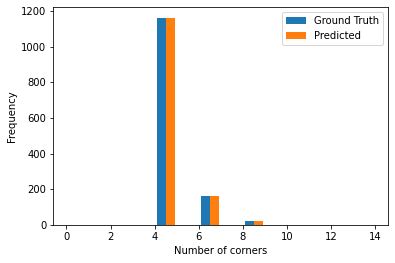

In [18]:

# Histogram
plt.hist([df["gt_corners"], df["rb_corners"]], bins=range(15), label=['Ground Truth', 'Predicted'])
plt.xlabel('Number of corners')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In conclusion, the prediction model for detecting the number of corners in a room performed very well on the dataset used for evaluation. The model was able to accurately detect the number of corners in each room with a mean value of 4.307350 and a maximum value of 10. The correlation coefficient between ground truth number of corners and number of corners found by the model is 1, indicating a perfect positive correlation. Additionally, the model had an RMSE and MAE of 0.0 and an R-squared value of 1.0, indicating a perfect fit to the data. The confusion matrix and classification report show that the model correctly classified all of the samples in the dataset with perfect precision, recall, and F1-score, as well as overall accuracy. Overall, the statistical evidences suggest that the model is a reliable and accurate tool for detecting the number of corners in a room.